<a href="https://colab.research.google.com/github/heleownae/DA_Insurance_PJT/blob/main/%EC%83%9D%EB%B3%B4_%EC%A7%80%EA%B8%89_X_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생명보험 지급금액이 존재하는 로우만 추려서 클러스터링 (3개 군집)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity


pd.set_option('display.max_columns', None)
# fin = pd.read_csv('final_enco_업권분류.csv')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 생명보험 지급금액 O인 데이터 파일 로드 //1375건

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코사인 군집파일/생보 코사인 지급 X.csv')

In [44]:
display(df)
print(df.columns)

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율,코사인군집
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,5.0,0.0,3.0,0.00,0.60,0.0,100.0,0
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4.0,3.0,0.0,0.75,0.00,0.0,100.0,1
2,9,657563,5707253,1,4,2,1,6,18,2,10,18.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,12.0,3.0,1.0,0.25,0.08,5.0,100.0,2
3,17,714478,6142305,1,7,2,1,6,17,2,10,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,8.0,1.0,4.0,0.12,0.50,0.0,100.0,2
4,20,575660,9524605,1,5,2,1,4,1300,2,20,1300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2,17.0,1.0,1.0,0.06,0.06,1.0,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20186,58233,1744456,2296853,1,3,2,1,1,210,2,38,210.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,13.0,6.0,0.0,0.46,0.00,0.0,100.0,1
20187,58235,311504,2866410,2,2,1,1,1,59,2,20,59.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,6.0,0.0,2.0,0.00,0.33,0.0,100.0,2
20188,58236,94045,3631343,2,4,2,1,3,47,2,20,47.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2,15.0,7.0,0.0,0.47,0.00,0.0,100.0,2
20189,58243,44716,6450867,2,5,7,2,4,90,2,10,90.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,5.0,1.0,0.0,0.20,0.00,2.0,100.0,1


Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율',
       '청구건수', '계약유지율', '코사인군집'],
      dtype='object')


In [ ]:
# 분석에 사용한 컬럼
# #'GENDER','AGE_GROUP','reduce_GBN_CD','CT_PY_CYCLE_CD','CT_PY_PD','mean_AMT','CT_CHNL_CD','GBN_CD_1','GBN_CD_2',	'GBN_CD_3','GBN_CD_4',
#                            '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율',
#                           '총지급금액','총지급 건수','기타','배책','사망/후유',	'수술/입원','실손',	'자동차'	,'진단/통원'	,'화재/재물'

#생보 군집 살펴보기
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

In [45]:
df['코사인군집'].value_counts()

코사인군집
1    8108
2    7312
0    4771
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20191 non-null  int64  
 1   JOIN_SN         20191 non-null  int64  
 2   POL_SN          20191 non-null  int64  
 3   GENDER          20191 non-null  int64  
 4   AGE_GROUP       20191 non-null  int64  
 5   reduce_GBN_CD   20191 non-null  int64  
 6   reduce_STAT_CD  20191 non-null  int64  
 7   CT_CHNL_CD      20191 non-null  int64  
 8   CT_PY_AMT       20191 non-null  int64  
 9   CT_PY_CYCLE_CD  20191 non-null  int64  
 10  CT_PY_PD        20191 non-null  int64  
 11  mean_AMT        20191 non-null  float64
 12  GBN_CD_1        20191 non-null  int64  
 13  GBN_CD_2        20191 non-null  int64  
 14  GBN_CD_3        20191 non-null  int64  
 15  GBN_CD_4        20191 non-null  int64  
 16  총지급금액           20191 non-null  int64  
 17  총지급 건수          20191 non-null 

In [47]:
# 불필요 컬럼 드랍
drop = [ '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권','총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물']
df.drop(columns=drop, inplace = True)

In [48]:
df.columns

Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율', '청구건수',
       '계약유지율', '코사인군집'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20191 non-null  int64  
 1   JOIN_SN         20191 non-null  int64  
 2   POL_SN          20191 non-null  int64  
 3   GENDER          20191 non-null  int64  
 4   AGE_GROUP       20191 non-null  int64  
 5   reduce_GBN_CD   20191 non-null  int64  
 6   reduce_STAT_CD  20191 non-null  int64  
 7   CT_CHNL_CD      20191 non-null  int64  
 8   CT_PY_AMT       20191 non-null  int64  
 9   CT_PY_CYCLE_CD  20191 non-null  int64  
 10  CT_PY_PD        20191 non-null  int64  
 11  mean_AMT        20191 non-null  float64
 12  GBN_CD_1        20191 non-null  int64  
 13  GBN_CD_2        20191 non-null  int64  
 14  GBN_CD_3        20191 non-null  int64  
 15  GBN_CD_4        20191 non-null  int64  
 16  보험계약건수          20191 non-null  float64
 17  해지건수            20191 non-null 

In [ ]:
df = df.astype({'JOIN_SN':'str', 'POL_SN':'str','GENDER':'str', 'AGE_GROUP':'str','reduce_GBN_CD':'str', 'reduce_STAT_CD':'str','CT_CHNL_CD':'str', 'CT_PY_CYCLE_CD':'str',  '코사인군집':'str'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20191 non-null  int64  
 1   JOIN_SN         20191 non-null  object 
 2   POL_SN          20191 non-null  object 
 3   GENDER          20191 non-null  object 
 4   AGE_GROUP       20191 non-null  object 
 5   reduce_GBN_CD   20191 non-null  object 
 6   reduce_STAT_CD  20191 non-null  object 
 7   CT_CHNL_CD      20191 non-null  object 
 8   CT_PY_AMT       20191 non-null  int64  
 9   CT_PY_CYCLE_CD  20191 non-null  object 
 10  CT_PY_PD        20191 non-null  int64  
 11  mean_AMT        20191 non-null  float64
 12  GBN_CD_1        20191 non-null  int64  
 13  GBN_CD_2        20191 non-null  int64  
 14  GBN_CD_3        20191 non-null  int64  
 15  GBN_CD_4        20191 non-null  int64  
 16  총지급금액           20191 non-null  int64  
 17  총지급 건수          20191 non-null 

In [50]:
grouped = df.groupby('코사인군집')

In [ ]:
grouped.describe(include='object')

JOIN_SN                      POL_SN                      GENDER         \
        count unique      top freq  count unique      top freq  count unique   
코사인군집                                                                          
0        4771   3486   988685   11   4771   4771  2197182    1   4771      2   
1        8108   5992   467406    7   8108   8108   254040    1   8108      2   
2        7312   5015  1180613   11   7312   7312  5707253    1   7312      2   

                AGE_GROUP                  reduce_GBN_CD                   \
      top  freq     count unique top  freq         count unique top  freq   
코사인군집                                                                       
0       2  2584      4771      9   5  1002          4771      6   7  2310   
1       2  4253      8108      9   4  1961          8108      6   1  2537   
2       2  4042      7312      9   5  1548          7312      6   2  4604   

      reduce_STAT_CD                  CT_CHNL_CD                   \
               count unique top  freq      count unique top  freq   
코사인군집                                                               
0               4771      4   1  2414       4771      8   1  1910   
1               8108      4   1  6961       8108      8   1  4120   
2               7312      4   1  6992       7312      8   6  3670   

      CT_PY_CYCLE_CD                   
               count unique top  freq  
코사인군집                                  
0               4771      4   2  3706  
1               8108      4   2  7617  
2               7312      4   2  7153

In [ ]:
grouped.describe()

Unnamed: 0                                                      \
           count          mean           std  min       25%      50%   
코사인군집                                                                  
0         4771.0  29832.299099  16786.598997  0.0  15430.00  29996.0   
1         8108.0  28982.449679  16673.692082  1.0  14489.00  29026.5   
2         7312.0  29306.669037  16872.037407  9.0  14518.25  29422.5   

                         CT_PY_AMT                                        \
            75%      max     count         mean          std  min    25%   
코사인군집                                                                      
0      44648.00  58326.0    4771.0  1312.778453  1905.073476  1.0  130.0   
1      43033.25  58243.0    8108.0   127.106438    54.281752  1.0   86.0   
2      44262.75  58236.0    7312.0    33.692287    16.017232  1.0   22.0   

                             CT_PY_PD                                         \
         50%     75%     max    count       mean        std  min   25%   50%   
코사인군집                                                                          
0      330.0  1200.0  5000.0   4771.0  13.079229  16.622218  0.0   3.0  10.0   
1      120.0   160.0   350.0   8108.0  16.642329  13.328394  0.0  10.0  15.0   
2       32.0    46.0   110.0   7312.0  15.304294   8.436086  0.0  10.0  15.0   

                  mean_AMT                                                \
        75%   max    count         mean          std   min    25%    50%   
코사인군집                                                                      
0      20.0  99.0   4771.0  1306.005135  1895.166900   1.0  130.0  330.0   
1      20.0  99.0   8108.0   127.141058    53.419198  11.0   86.0  120.0   
2      20.0  99.0   7312.0    33.498097    15.735034   1.0   22.0   32.0   

                      GBN_CD_1                                               \
          75%     max    count      mean       std  min  25%  50%  75%  max   
코사인군집                                                                         
0      1200.0  5000.0   4771.0  0.884091  0.320149  0.0  1.0  1.0  1.0  1.0   
1       160.0   260.0   8108.0  0.903552  0.295223  0.0  1.0  1.0  1.0  1.0   
2        45.0    87.0   7312.0  0.475383  0.499428  0.0  0.0  0.0  1.0  1.0   

      GBN_CD_2                                              GBN_CD_3  \
         count      mean       std  min  25%  50%  75%  max    count   
코사인군집                                                                  
0       4771.0  0.301614  0.459007  0.0  0.0  0.0  1.0  1.0   4771.0   
1       8108.0  0.540084  0.498421  0.0  0.0  1.0  1.0  1.0   8108.0   
2       7312.0  0.770651  0.420443  0.0  1.0  1.0  1.0  1.0   7312.0   

                                                   GBN_CD_4            \
           mean       std  min  25%  50%  75%  max    count      mean   
코사인군집                                                                   
0      0.209600  0.407066  0.0  0.0  0.0  0.0  1.0   4771.0  0.099769   
1      0.453749  0.497887  0.0  0.0  0.0  1.0  1.0   8108.0  0.153429   
2      0.349973  0.476994  0.0  0.0  0.0  1.0  1.0   7312.0  0.164114   

                                           총지급금액                           \
            std  min  25%  50%  75%  max   count mean  std  min  25%  50%   
코사인군집                                                                       
0      0.299724  0.0  0.0  0.0  0.0  1.0  4771.0  0.0  0.0  0.0  0.0  0.0   
1      0.360422  0.0  0.0  0.0  0.0  1.0  8108.0  0.0  0.0  0.0  0.0  0.0   
2      0.370404  0.0  0.0  0.0  0.0  1.0  7312.0  0.0  0.0  0.0  0.0  0.0   

                 총지급 건수                                         기타            \
       75%  max   count mean  std  min  25%  50%  75%  max   count mean  std   
코사인군집                                                                          
0      0.0  0.0  4771.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4771.0  0.0  0.0   
1      0.0  0.0  8108.0  0.0  0.0  0.0  0.0  0.0

### gender
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

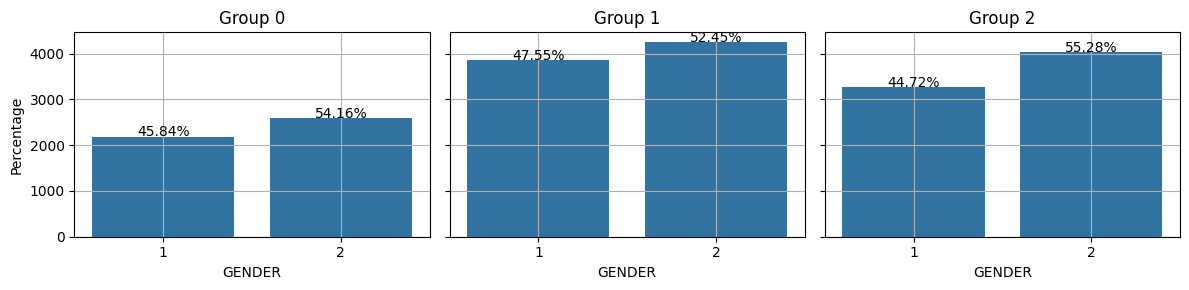

In [ ]:
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='GENDER', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GENDER')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


### age_group
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

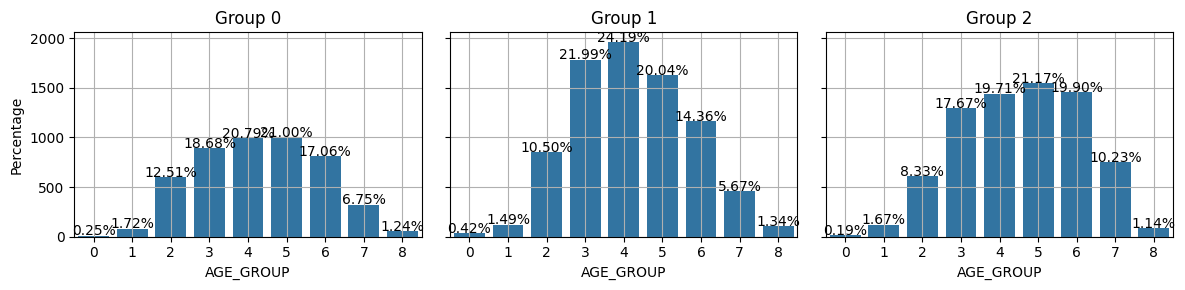

In [ ]:
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='AGE_GROUP', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('AGE_GROUP')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()



### reduce_GBN
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

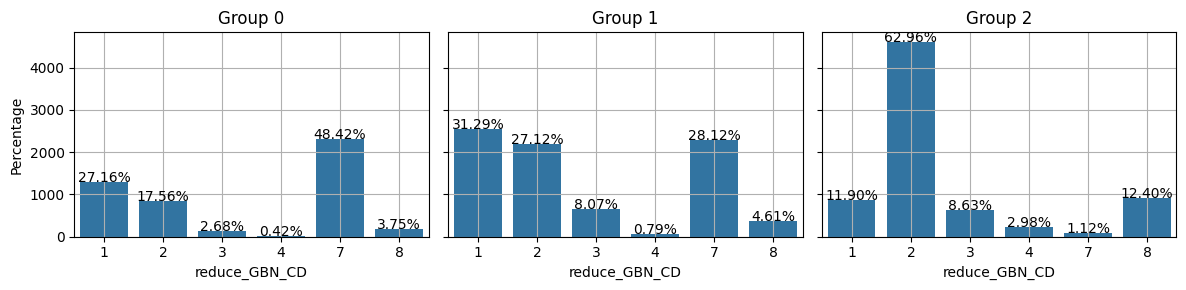

In [ ]:
# # '코사인군집'의 유니크한 값을 찾기
# unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# # 서브플롯 준비
# fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# # 각 유니크한 're_group' 값에 대해 서브플롯 생성
# for ax, group in zip(axes, unique_group):
#     # 현재 cycle 값에 해당하는 데이터 필터링
#     subset = df[df['코사인군집'] == group]

#     # countplot 그리기
#     sns.countplot(x='reduce_GBN_CD', data=subset, ax=ax)
#     ax.set_title(f'Group {group}')
#     ax.set_xlabel('reduce_GBN_CD')
#     ax.set_ylabel('Frequency')
#     ax.grid(True)

# plt.tight_layout()
# plt.show()


# import seaborn as sns
# import matplotlib.pyplot as plt

# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='reduce_GBN_CD', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('reduce_GBN_CD')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
- 보험종류코드: 차원 축소
 1   - 사망류: 종신(01), 정기(02)
 2  - 질병류: 질병(03), 암(05)
 3 - 상해보험(04) 단독
 4- 어린이보험(07), 실비보험(16)
 5- 운전자(13) 단독
 6 - 여행자(14) 단독
 7 - 연금저축(09), 연금(10), 저축(11)
 8 - 기타: 간병(06), 치아(08), 교육(12), 골프(15), 기타보험(99)
 9- 화재(18)
    - 값 없음(0건): 자동차(17), 배상책임(19). 무시.


### CT_PY_PD
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

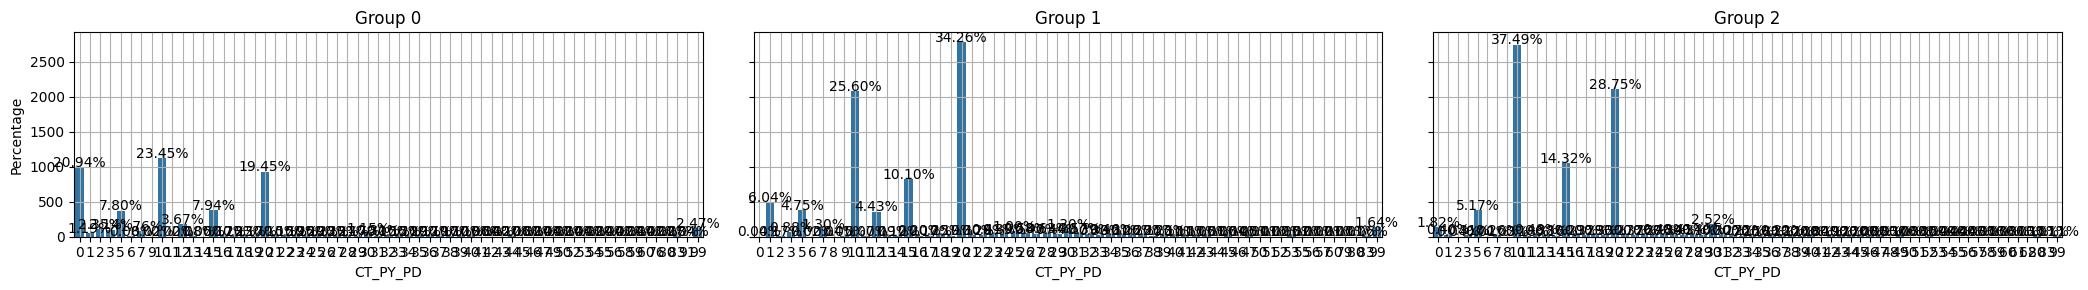

In [ ]:
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(21, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='CT_PY_PD', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('CT_PY_PD')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

### mean_AMT
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

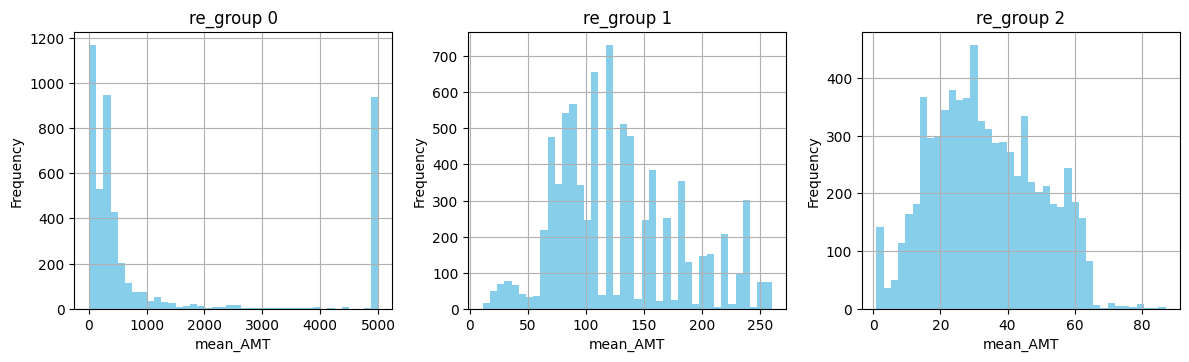

In [ ]:
# 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
unique_cycles = df['코사인군집'].unique()
# subplots와 subplot은 다른 것!!!


#전체 크기를 조절하는 코드
#있어도 되고 없어도된다.
plt.figure(figsize=(12, 10))


# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
    plt.subplot(3,len(unique_cycles),i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기
    plt.hist(subset['mean_AMT'], bins=40, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('mean_AMT')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 보험계약건수

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0a47b4eba5d2>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

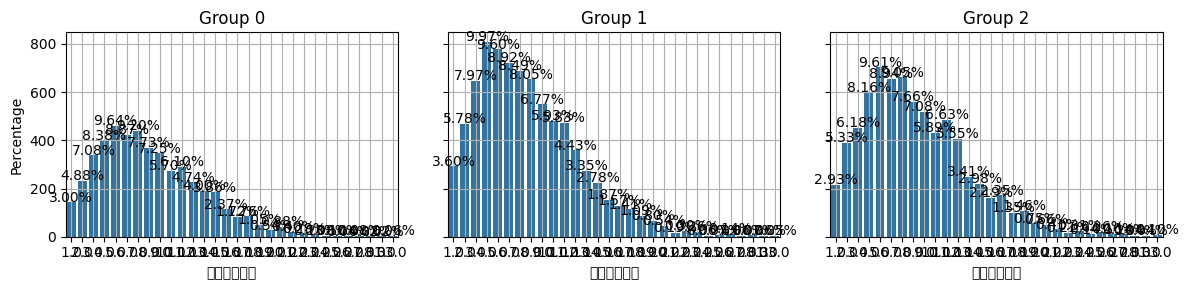

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='보험계약건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('보험계약건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


### 해지
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-26-056e6e88cbe2>:23: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-056e6e88cbe2>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-26-056e6e88cbe2>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-26-056e6e88cbe2>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWa

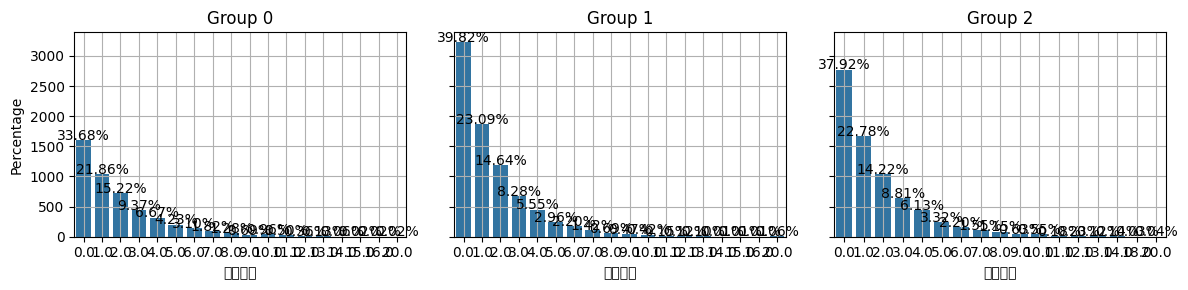

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='해지건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('해지건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

### 만기
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-27-7d9f7ea65ea7>:23: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-7d9f7ea65ea7>:23: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-7d9f7ea65ea7>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-27-7d9f7ea65ea7>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWa

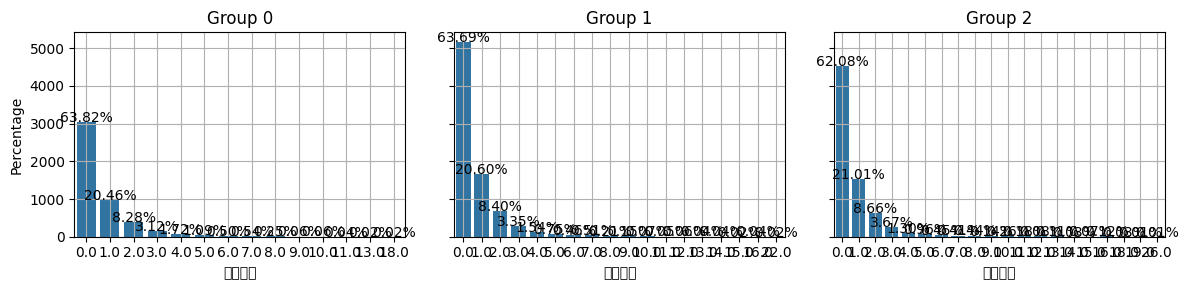

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='만기건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('만기건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

### 청구건수

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-28-7f02578ac7f7>:23: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-28-7f02578ac7f7>:23: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
<ipython-input-28-7f02578ac7f7>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-28-7f02578ac7f7>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

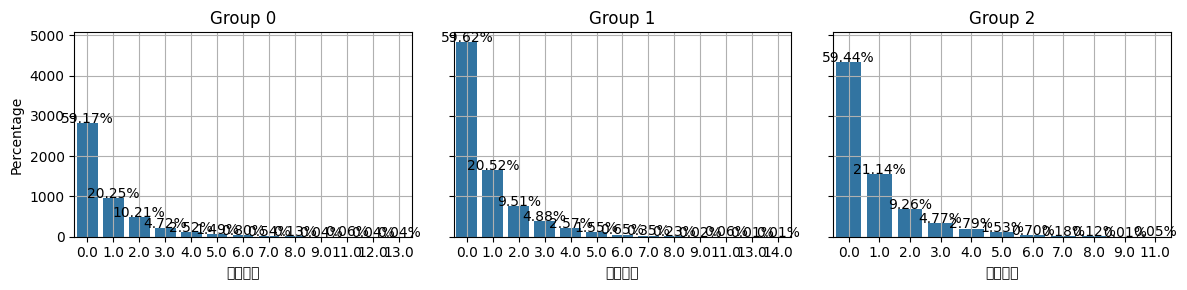

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='청구건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('청구건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

### 계약 유지율

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-37-bd6fe107e6aa>:43: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bd6fe107e6aa>:43: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bd6fe107e6aa>:43: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bd6fe107e6aa>:43: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bd6fe107e6aa>:43: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  plt.tight_layout()


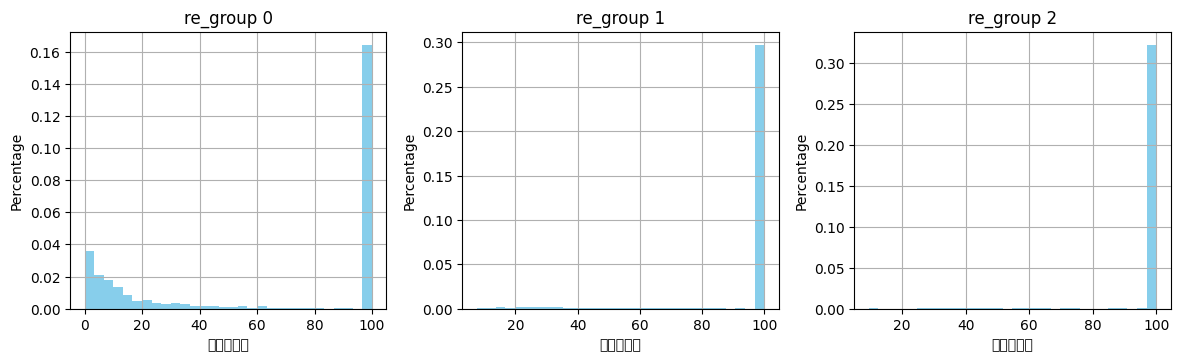

In [ ]:
# # 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
# unique_cycles = df['코사인군집'].unique()
# # subplots와 subplot은 다른 것!!!


# #전체 크기를 조절하는 코드
# #있어도 되고 없어도된다.
# plt.figure(figsize=(12, 10))


# # 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
# for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
#     plt.subplot(3,len(unique_cycles),i+1)
#     # 현재 cycle 값에 해당하는 데이터 필터링
#     subset = df[df['코사인군집'] == cycle]
#     # 히스토그램 그리기
#     plt.hist(subset['계약유지율'], bins=30, color='skyblue')
#     plt.title(f're_group {cycle}')
#     plt.xlabel('계약유지율')
#     plt.ylabel('Frequency')
#     plt.grid(True)

# plt.tight_layout()
# plt.show()
# 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
unique_cycles = df['코사인군집'].unique()

# 전체 크기를 조절하는 코드
plt.figure(figsize=(12, 10))

# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):
    plt.subplot(3, len(unique_cycles), i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기 (퍼센트로 표현)
    plt.hist(subset['계약유지율'], bins=30, density=True, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('계약유지율')
    plt.ylabel('Percentage')
    plt.grid(True)

plt.tight_layout()
plt.show()


## 해지율

<ipython-input-52-d6d1efe01f83>:18: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
<ipython-input-52-d6d1efe01f83>:18: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-52-d6d1efe01f83>:18: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  plt.tight_layout()


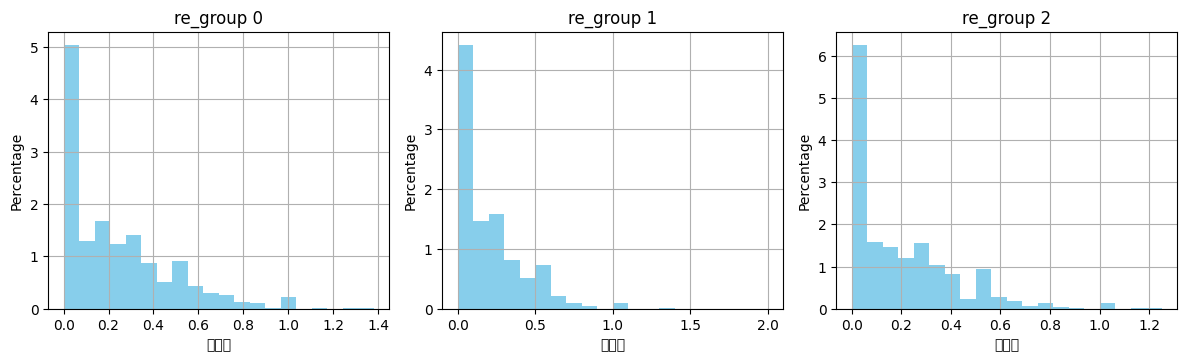

In [52]:
unique_cycles = df['코사인군집'].unique()

# 전체 크기를 조절하는 코드
plt.figure(figsize=(12, 10))

# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):
    plt.subplot(3, len(unique_cycles), i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기 (퍼센트로 표현)
    plt.hist(subset['해지율'], bins=20, density=True, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('해지율')
    plt.ylabel('Percentage')
    plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-53-f6c97c75c78e>:18: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  plt.tight_layout()
<ipython-input-53-f6c97c75c78e>:18: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-53-f6c97c75c78e>:18: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


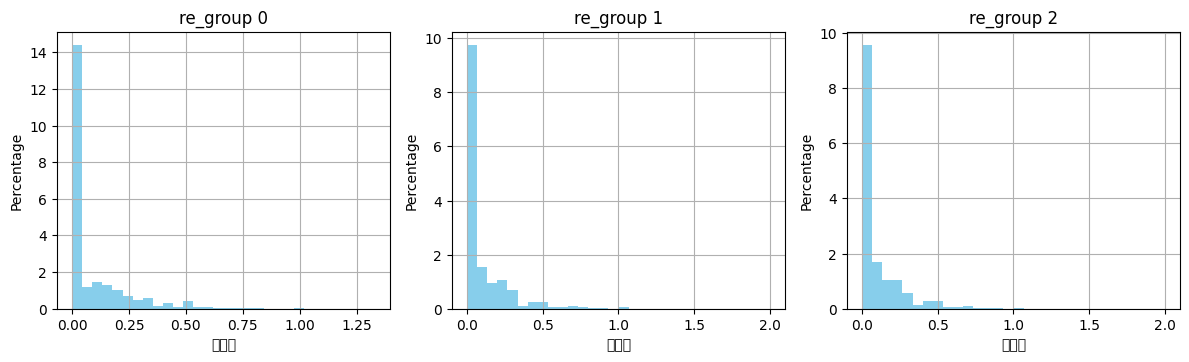

In [53]:
unique_cycles = df['코사인군집'].unique()

# 전체 크기를 조절하는 코드
plt.figure(figsize=(12, 10))

# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):
    plt.subplot(3, len(unique_cycles), i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기 (퍼센트로 표현)
    plt.hist(subset['만기율'], bins=30, density=True, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('만기율')
    plt.ylabel('Percentage')
    plt.grid(True)

plt.tight_layout()
plt.show()


## GBN_CD_1

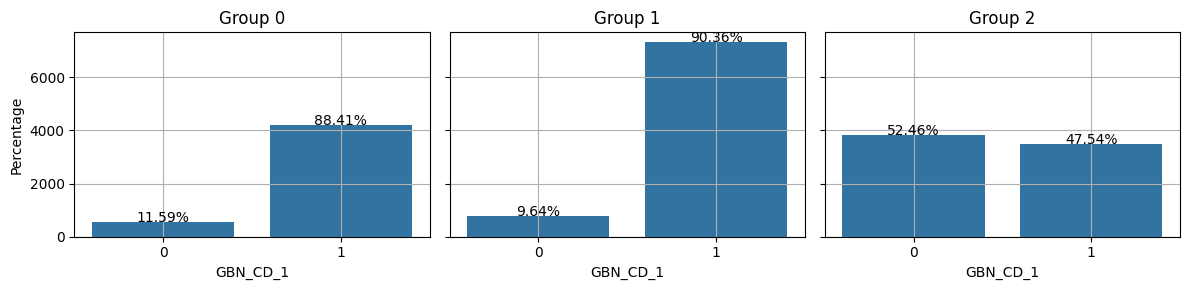

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='GBN_CD_1', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GBN_CD_1')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


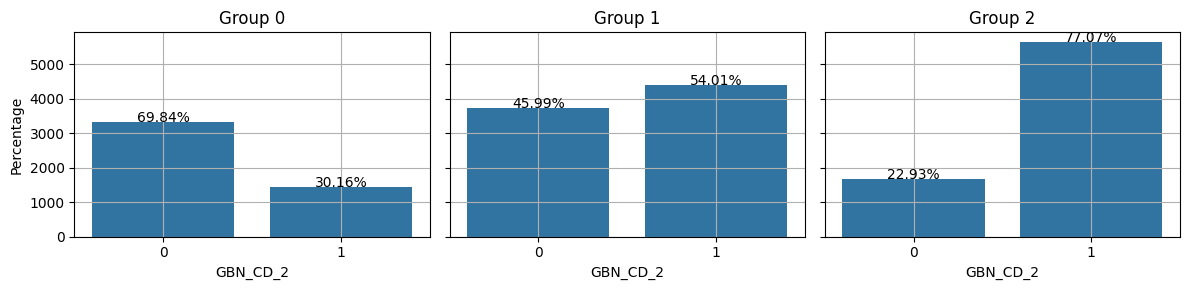

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='GBN_CD_2', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GBN_CD_2')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


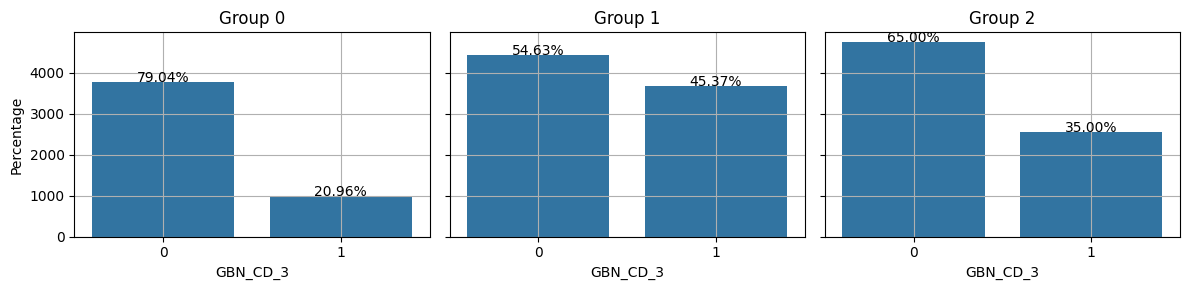

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='GBN_CD_3', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GBN_CD_3')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

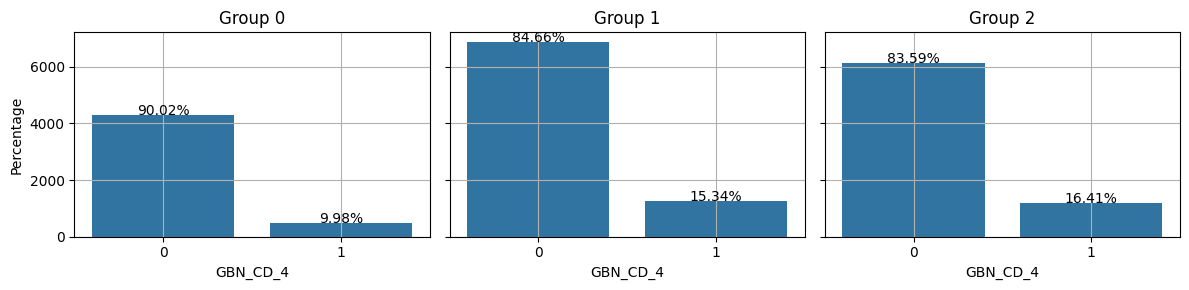

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='GBN_CD_4', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GBN_CD_4')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

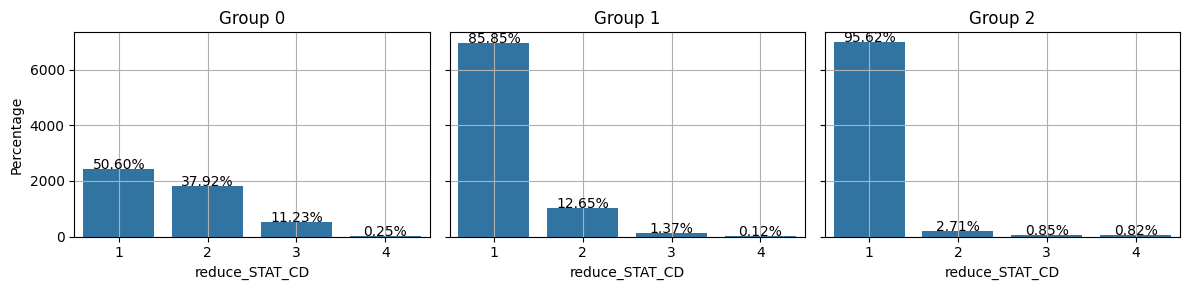

In [54]:
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='reduce_STAT_CD', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('reduce_STAT_CD')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()